In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper import *

In [97]:
X,Y = load_dataset('xor')
print(X.shape,Y.shape)

(4, 2) (4,)


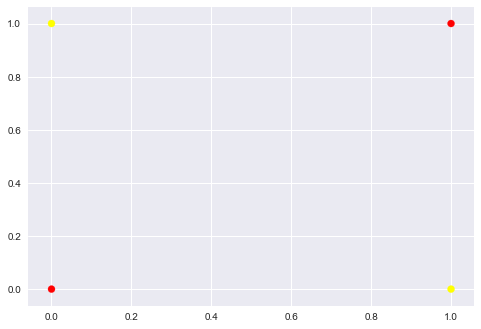

In [98]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.autumn)
plt.show()

In [99]:
# Model Details
input_size = 2
layers = [4,3] #Hidden Layers
output_size = 2
# 2 --> 4 --> 3 ---> 2 classes

In [100]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

In [101]:
softmax([[10,10,10],
         [10,10,20]])

array([[3.33333333e-01, 3.33333333e-01, 3.33333333e-01],
       [4.53958078e-05, 4.53958078e-05, 9.99909208e-01]])

In [118]:
class NeuralNetwork:
    def __init__(self,input_size,l,output_size):
        np.random.seed(0)
        model = {}
        model['W1']  = np.random.randn(input_size,l[0])
        model['b1'] = np.zeros((1,l[0]))
        
        model['W2']  = np.random.randn(l[0],l[1])
        model['b2'] = np.zeros((1,l[1]))
        
        model['W3']  = np.random.randn(l[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        self.model = model
        
    def forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        # Store the layer wise output for backprop later
        self.activations = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.01):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_ = self.activations
        
        # First Step
        d3 = (y_ - y)
        dw3 = np.dot(a2.T,d3)
        db3 = np.sum(d3,axis=0)
        
        # Second Step
        d2 = np.dot(d3,W3.T)*(1-np.square(a2))
        dw2 = np.dot(a1.T,d2)
        db2 = np.sum(d2,axis=0)
        
        # Third Step
        d1 = np.dot(d2,W2.T)*(1-np.square(a1))
        dw1 = np.dot(x.T,d1)
        db1 = np.sum(d1,axis=0)
        
        # Gradient Descent 
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
    
    def predict(self,x):
        out = self.forward(x)
        return np.argmax(out,axis=1)


In [119]:
from keras.utils import to_categorical

In [120]:
def preprocessData(x,y):
    return x,to_categorical(y)
def loss(y_oht,pred):
    l = -np.mean(y_oht*np.log(pred))
    return l
def getAcc(X,YOHT,model):
    pred = model.predict(X)
    Y = np.argmax(YOHT,axis=1)
    cnt = np.sum(Y==pred)/Y.shape[0]
    #print(cnt)
    return cnt

def train(X,YOHT,model,epochs):
    
    train_loss = []
    
    for i in range(epochs):
        Y_ = model.forward(X)
        l = loss(YOHT,Y_)
        model.backward(X,YOHT)
        if (i%5==0):
            acc = getAcc(X,YOHT,model)
            print("Epoch %d Loss %.2f Acc %.2f"%(i+1,l,acc))
            
    

In [121]:
model = NeuralNetwork(2,layers,output_size)

In [122]:
YOHT = to_categorical(Y)

In [123]:
YOHT.shape

(4, 2)

In [124]:
train(X,YOHT,model,100)

Epoch 1 Loss 0.96 Acc 0.25
Epoch 6 Loss 0.66 Acc 0.50
Epoch 11 Loss 0.51 Acc 0.50
Epoch 16 Loss 0.42 Acc 0.75
Epoch 21 Loss 0.35 Acc 0.75
Epoch 26 Loss 0.31 Acc 0.75
Epoch 31 Loss 0.27 Acc 0.75
Epoch 36 Loss 0.25 Acc 0.75
Epoch 41 Loss 0.23 Acc 1.00
Epoch 46 Loss 0.21 Acc 1.00
Epoch 51 Loss 0.19 Acc 1.00
Epoch 56 Loss 0.18 Acc 1.00
Epoch 61 Loss 0.16 Acc 1.00
Epoch 66 Loss 0.15 Acc 1.00
Epoch 71 Loss 0.14 Acc 1.00
Epoch 76 Loss 0.13 Acc 1.00
Epoch 81 Loss 0.12 Acc 1.00
Epoch 86 Loss 0.11 Acc 1.00
Epoch 91 Loss 0.11 Acc 1.00
Epoch 96 Loss 0.10 Acc 1.00


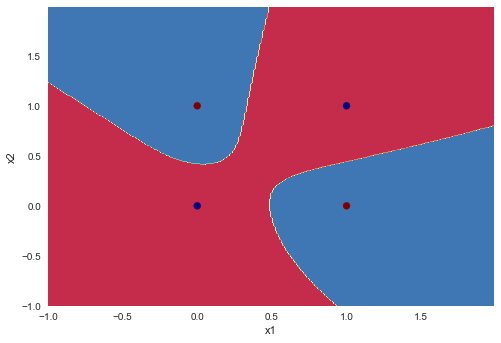

In [125]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)